In [28]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
aws_access_key_id = 'your_access_key_id'
aws_secret_access_key = 'your_secret_access_key'

In [31]:
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

In [32]:
s3 = session.client('s3')

In [33]:
response = s3.list_buckets()

In [35]:
for bucket in response['Buckets']:
  bucket_name = bucket['Name']

print(bucket_name)

tejaswetal


In [36]:
bucket_name = 'tejaswetal'
file_name = 'facts.csv'
local_file_path = '/content/'+file_name

In [37]:
s3.download_file(bucket_name,file_name,local_file_path)

In [38]:
df = pd.read_csv('/content/facts.csv')
df.head(20)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436.0,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56


In [39]:
df.columns

Index(['id', 'code', 'name', 'area', 'area_land', 'area_water', 'population',
       'population_growth', 'birth_rate', 'death_rate', 'migration_rate'],
      dtype='object')

In [40]:
# Finding countries having area greater than the average area
df2 = df[df['area']>df['area'].mean()]

In [41]:
#  Q1 Finding the top 10 countries based on population
df3 = df2.sort_values(by=['population'],ascending=False).head(10)
top10_popu = df3['name'].to_list()
print(top10_popu)

['China', 'India', 'European Union', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Nigeria', 'Russia', 'Mexico']


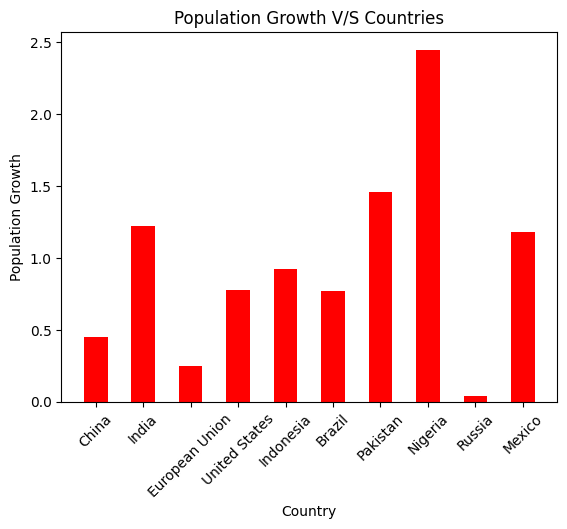

In [42]:
# Q2 How has the world population changed for these top 10 countries
x = df3['name']
y = df3['population_growth']
plt.bar(x,y,color='red',width = 0.5)
plt.xlabel('Country')
plt.ylabel('Population Growth')
plt.title('Population Growth V/S Countries')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Q3 country having highest population growth
df[df['population_growth']==df['population_growth'].max()]

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
161,162,od,South Sudan,644329.0,NaN,NaN,12042910.0,4.02,36.91,8.18,11.47


In [44]:
# Q4 country having lowest population growth
df[df['population_growth']==df['population_growth'].min()]

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
189,190,vt,Holy See (Vatican City),0.0,0.0,0.0,842.0,0.0,NaN,NaN,NaN
199,200,ck,Cocos (Keeling) Islands,14.0,14.0,0.0,596.0,0.0,NaN,NaN,NaN
206,207,gl,Greenland,2166086.0,2166086.0,NaN,57733.0,0.0,14.48,8.49,5.98
237,238,pc,Pitcairn Islands,47.0,47.0,0.0,48.0,0.0,NaN,NaN,NaN


In [45]:
# Q5 country having highest population density
df.dropna(inplace=True)
df['Population Density'] = df['population']/df['area']
df[df['Population Density'] == df['Population Density'].max()]

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,Population Density
204,205,mc,Macau,28.0,28.0,0.0,592731.0,0.8,8.88,4.22,3.37,21168.964286


In [46]:
# Q6 country having lowest population density
df.dropna(inplace=True)
df['Population Density'] = df['population']/df['area']
df[df['Population Density'] == df['Population Density'].min()]

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,Population Density
117,118,mg,Mongolia,1564116.0,1553556.0,10560.0,2992908.0,1.31,20.25,6.35,0.84,1.913482


In [47]:
# Q7 Plot a bar graph for top 5 populous countries
df4 = df3.head(5)

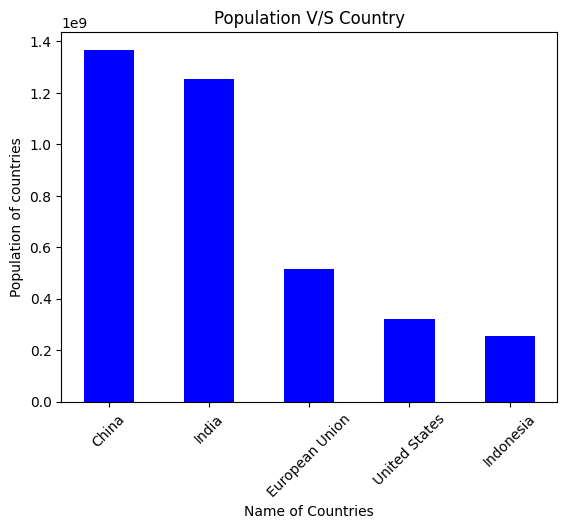

In [48]:
x = df4['name']
y = df4['population']
plt.bar(x,y,color='blue',width=0.5)
plt.xlabel("Name of Countries")
plt.ylabel("Population of countries")
plt.title("Population V/S Country")
plt.xticks(rotation=45)
plt.show()

In [49]:
# Q8 Correlation between area_water and migration_rate
df5 = df3[['area_water','migration_rate']]
df5

,area_water,migration_rate
36,270550.0,0.44
76,314070.0,0.04
196,NaN,2.50
185,664709.0,3.86
77,93000.0,1.16
23,157630.0,0.14
131,25220.0,1.54
128,13000.0,0.22
142,720500.0,1.69
113,20430.0,1.68


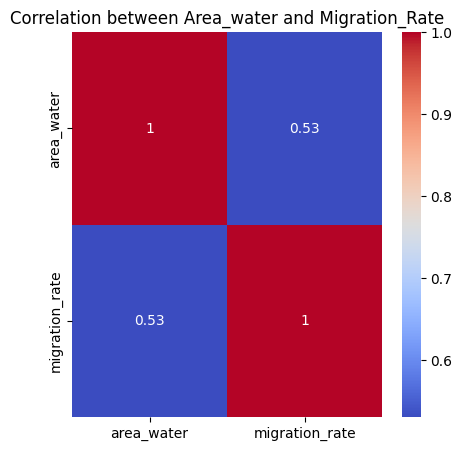

In [50]:
matrix = df5.corr()
plt.figure(figsize=(5,5))
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between Area_water and Migration_Rate')
plt.show()

In [51]:
df6 = df[['area','area_land','area_water','population','population_growth','birth_rate','death_rate','migration_rate']]

In [52]:
# Q9 Correlation Matrix for all the parameters
matrix2 = df6.corr()

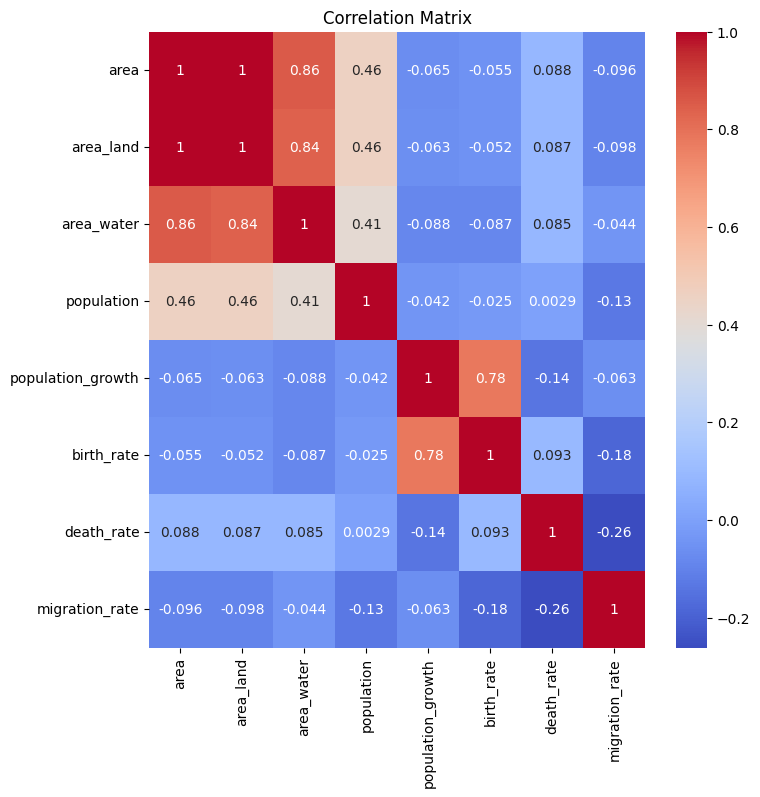

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(matrix2,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()